<div>
Olá, Rafael!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

# Qual é o melhor plano?

Você trabalha como analista para a empresa de telecomunicações Megaline. A empresa oferece aos clientes dois planos pré-pagos: Surf e Ultimate. O departamento comercial quer saber qual dos planos gera mais receita para ajustar o orçamento de publicidade.

Você vai realizar uma análise preliminar dos planos com base em uma pequena seleção de clientes. Você terá dados de 500 clientes da Megaline: que clientes são, de onde eles são, qual plano usam e o número de chamadas e mensagens realizadas em 2018. Seu trabalho é analisar o comportamento dos clientes e determinar qual plano pré-pago gera mais receita.

[Fornecemos alguns comentários para guiar sua linha de raciocínio enquanto você conclui esse projeto. Entretanto, certifique-se de remover todos os comentários entre colchetes antes de enviar o projeto.]

[Antes de mergulhar na análise dos seus dados, explique em suas palavras o propósito do projeto e as ações que planeja realizar.]

[Tenha em mente que estudar, modificar e analisar dados é um processo iterativo. É normal retornar a etapas anteriores e corrigir/expandir algo para permitir as próximas etapas.]

## Inicialização

In [1]:
# Carregando todas as bibliotecas
import pandas as pd
import numpy as np
import math as mt
from math import factorial
from scipy import stats as st
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

## Carregue os dados

In [8]:
# Carregue os arquivos de dados em diferentes DataFrames
df_users = pd.read_csv('datasets/megaline_users.csv')
df_calls = pd.read_csv('datasets/megaline_calls.csv')
df_messages = pd.read_csv('datasets/megaline_messages.csv') 
df_internet = pd.read_csv('datasets/megaline_internet.csv')
df_plans = pd.read_csv('datasets/megaline_plans.csv')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>


## Prepare os dados

[Os dados deste projeto estão divididos em várias tabelas. Explore cada uma para obter uma compreensão inicial dos dados. Faça correções em cada tabela, se necessário.]

## Planos

In [3]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


In [4]:
# Imprima uma amostra de dados dos planos
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


O dataframe `megaline_plans.csv` possui apenas 2 linhas com informações sobre os planos. Não há alteração a ser feita.

## Corrija os dados

Os dados da tabela são apenas dois e todos classificados corretamente com os tipos em `Dtype`. Não há dado nulo, faltante ou duplicado.

## Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e head foram utilizados para estudo inicial dos dados.
- Dica: adicione suas observações acima explicando o motivo pelo qual não foram necessárias correções dos dados
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
* Justificativa pelo qual não foram necessárias correções dos dados incluídas.
</div>

## Usuários

In [5]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos usuários
df_users.info()
print()
print(df_users.duplicated().value_counts()) #verificando duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB

False    500
Name: count, dtype: int64


In [6]:
# Imprima uma amostra de dados dos usuários
print(df_users.head(10))
print()
print(df_users.describe())

   user_id first_name  last_name  age                                    city  \
0     1000   Anamaria      Bauer   45   Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28         Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36    Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                           Tulsa, OK MSA   
4     1004    Leonila   Thompson   40         Seattle-Tacoma-Bellevue, WA MSA   
5     1005      Livia    Shields   31     Dallas-Fort Worth-Arlington, TX MSA   
6     1006     Jesusa   Bradford   73  San Francisco-Oakland-Berkeley, CA MSA   
7     1007    Eusebio      Welch   42           Grand Rapids-Kentwood, MI MSA   
8     1008      Emely    Hoffman   53       Orlando-Kissimmee-Sanford, FL MSA   
9     1009      Gerry     Little   19  San Jose-Sunnyvale-Santa Clara, CA MSA   

     reg_date      plan  churn_date  
0  2018-12-24  ultimate         NaN  
1  2018-08-13      surf         

* Existem linhas com valores nulos na coluna `churn_date`, o que significa que os planos ainda estão ativos. Estes valores nulos serão padronizados com a string `active`.
* conforme verificado, não existem valores duplicados.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [7]:
#df_users['churn_date'] = df_users['churn_date'].fillna('active') #substituindo valores nulos por 'active'
df_users['active'] = df_users['churn_date'].isnull().astype(int)
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,1
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN,1
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,0
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN,1
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,1
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN,1


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>    
- Aqui você não deve preencher o variável `churn_date` com uma string, pois esse campo é do tipo data. Você pode deixar esse campo sem processar e criar uma outra variável indicando se o cliente cancelou ou preencher com dados do mesmo tipo.
</s>
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
* Dados da coluna `churn_date`foram mantidos e criei uma nova coluna chamada `active` com informação '1' para serviço ativo e '0' para serviço desativado.
</div>

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

## Chamadas

In [8]:
# Imprima as informações gerais/resumidas sobre o DataFrame das chamadas
df_calls.info()
print()
print(df_calls.duplicated().value_counts()) #verificando duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB

False    137735
Name: count, dtype: int64


In [9]:
# Imprima uma amostra de dados das chamadas
print(df_calls.head(10))
print()
print(df_calls.describe())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22
5  1000_388     1000  2018-12-31      2.20
6  1000_510     1000  2018-12-27      5.75
7  1000_521     1000  2018-12-28     14.18
8  1000_530     1000  2018-12-28      5.77
9  1000_544     1000  2018-12-26      4.40

             user_id       duration
count  137735.000000  137735.000000
mean     1247.658046       6.745927
std       139.416268       5.839241
min      1000.000000       0.000000
25%      1128.000000       1.290000
50%      1247.000000       5.980000
75%      1365.000000      10.690000
max      1499.000000      37.600000


Analisando os dados acima, percebemos a necessidade de alguns ajustes.
* Coluna `call_date` precisa ser transformada de `object` para `datetime`. 
* Os tempo de duração de chamadas na coluna `duration` serão arredondados de acordo com as regras de tarifação estabelecidas pela operadora.
* Será criada uma nova coluna chamada `month` que armazenará apenas os meses da coluna `call_date`.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [10]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date']) #transformando os dados para datetime
df_calls['duration'] = df_calls['duration'].apply(mt.ceil) #arredondamento da duração de chamada para cima

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [11]:
df_calls['month'] = df_calls['call_date'].dt.month #criando nova coluna com informação do mês
df_calls.head(10)

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12
5,1000_388,1000,2018-12-31,3,12
6,1000_510,1000,2018-12-27,6,12
7,1000_521,1000,2018-12-28,15,12
8,1000_530,1000,2018-12-28,6,12
9,1000_544,1000,2018-12-26,5,12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo dos dados
- Os valores ausentes foram verificados
- Os campos foram convertidos para os tipos adequados. Os campos de data foram corrigidos.
- O método `describe()` foi utilizado para calcular estatísticas descritivas do conjunto de dados
</div>


## Mensagens

In [12]:
# Imprima as informações gerais/resumidas sobre o DataFrame das mensagens
df_messages.info()
print()
print(df_messages.duplicated().value_counts()) #verificando duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB

False    76051
Name: count, dtype: int64


In [13]:
# Imprima uma amostra dos dados das mensagens
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Analisando os dados acima, percebemos a necessidade de alguns ajustes.
* Coluna `message_date` precisa ser transformada de `object` para `datetime`. 
* Será criada uma nova coluna chamada `month` que armazenará apenas os meses da coluna `message_date`.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [14]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date']) #transformando os dados para datetime

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [15]:
df_messages['month'] = df_messages['message_date'].dt.month #criando nova coluna com informação do mês
df_messages.head(10)

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12
5,1000_346,1000,2018-12-29,12
6,1000_386,1000,2018-12-30,12
7,1000_413,1000,2018-12-31,12
8,1000_502,1000,2018-12-27,12
9,1000_525,1000,2018-12-28,12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo dos dados
- Os valores ausentes foram verificados
- Os campos foram convertidos para os tipos adequados. Os campos de data foram corrigidos.
</div>


## Internet

In [16]:
# Imprima as informações gerais/resumidas sobre o DataFrame da internet
df_internet.info()
print()
print(df_internet.duplicated().value_counts()) #verificando duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB

False    104825
Name: count, dtype: int64


In [17]:
#  Imprima uma amostra de dados para o tráfego da internet
print(df_internet.head(10))
print()
print(df_internet.describe())

         id  user_id session_date  mb_used
0   1000_13     1000   2018-12-29    89.86
1  1000_204     1000   2018-12-31     0.00
2  1000_379     1000   2018-12-28   660.40
3  1000_413     1000   2018-12-26   270.99
4  1000_442     1000   2018-12-27   880.22
5    1001_0     1001   2018-08-24   284.68
6    1001_3     1001   2018-12-09   656.04
7    1001_4     1001   2018-11-04    16.97
8   1001_10     1001   2018-11-27   135.18
9   1001_15     1001   2018-12-13   761.92

             user_id        mb_used
count  104825.000000  104825.000000
mean     1242.496361     366.713701
std       142.053913     277.170542
min      1000.000000       0.000000
25%      1122.000000     136.080000
50%      1236.000000     343.980000
75%      1367.000000     554.610000
max      1499.000000    1693.470000


Analisando os dados acima, percebemos a necessidade de alguns ajustes.
* Coluna `session_date` precisa ser transformada de `object` para `datetime`. 
* A qauntidade de dados trafegados por usuário na coluna `mb_used` serão ajustados de acordo com as regras de tarifação estabelecidas pela operadora.
* Será criada uma nova coluna chamada `month` que armazenará apenas os meses da coluna `session_date`.

### Corrija os dados

[Corrija problemas óbvios com os dados conforme as observações iniciais.]

In [18]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date']) #transformando os dados para datetime

### Enriqueça os dados

[Inclua fatores adicionais aos dados se você acredita que eles podem ser úteis.]

In [19]:
df_internet['month'] = df_internet['session_date'].dt.month #criando nova coluna com informação do mês
df_internet.head(10)

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
5,1001_0,1001,2018-08-24,284.68,8
6,1001_3,1001,2018-12-09,656.04,12
7,1001_4,1001,2018-11-04,16.97,11
8,1001_10,1001,2018-11-27,135.18,11
9,1001_15,1001,2018-12-13,761.92,12


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Os métodos `info()` e `head()` foram utilizados para estudo dos dados de internet
- Os valores ausentes foram verificados
- Os campos foram convertidos para os tipos adequados. Os campos de data foram corrigidos.
</div>


## Estude as condições dos planos

[É fundamental entender como os planos funcionam e como são as cobranças dos usuários com base na assinatura. Sugerimos imprimir as informações do plano para visualizar novamente as condições.]

In [20]:
df_plans.head()# Imprima as condições do plano e certifique-se de que elas fazem sentido para você



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Agregue os dados por usuário

[Agora, como os dados estão limpos, agregue os dados por usuário por período para ter apenas um registro por usuário por período. Isso vai facilitar muito a análise posterior.]

In [21]:
# Calcule o número de chamadas feitas por cada usuário por mês. Salve o resultado.
call_num = df_calls.groupby(['user_id', 'month'])['id'].count().reset_index() #agrupar por user_id e contar cada evento
call_num.rename(columns={'id': 'total_calls'}, inplace=True) #renomear a coluna 'id' por 'total_calls'
print(call_num)

      user_id  month  total_calls
0        1000     12           16
1        1001      8           27
2        1001      9           49
3        1001     10           65
4        1001     11           64
...       ...    ...          ...
2253     1498     12           39
2254     1499      9           41
2255     1499     10           53
2256     1499     11           45
2257     1499     12           65

[2258 rows x 3 columns]


In [22]:
# Calcule a quantidade de minutos gastos por cada usuário por mês. Salve o resultado.
call_time = df_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index() #agrupar por user_id e somar cada evento
call_time.head(10)

,user_id,month,duration
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426
5,1001,12,412
6,1002,10,59
7,1002,11,386
8,1002,12,384
9,1003,12,1104


In [23]:
# Calcule o número de mensagens enviadas por cada usuário por mês. Salve o resultado.
msg_num = df_messages.groupby(['user_id', 'month'])['id'].count().reset_index() #agrupar por user_id e contar cada evento
msg_num.rename(columns={'id': 'total_msg'}, inplace=True) #renomear a coluna 'id' por 'total_msg'
msg_num.head(10)

,user_id,month,total_msg
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
5,1001,12,44
6,1002,10,15
7,1002,11,32
8,1002,12,41
9,1003,12,50


In [24]:
# Calcule o volume de tráfego de internet usado por cada usuário por mês. Salve o resultado.
traffic_data = df_internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index() #agrupar por user_id e somar cada evento
traffic_data.rename(columns={'id': 'total_traffic'}, inplace=True) #renomear a coluna 'id' por 'total_traffic'

traffic_data['GB_used'] = traffic_data['mb_used'] / 1024 #transformar mb para GB
traffic_data['rounded_data'] = traffic_data['GB_used'].apply(mt.ceil) #arredondar valor total de GB de acordo com regras da operadora
traffic_data.drop('mb_used', axis=1, inplace=True) #excluir coluna
traffic_data.drop('GB_used', axis=1, inplace=True) #excluir coluna
traffic_data.head(10)

,user_id,month,rounded_data
0,1000,12,2
1,1001,8,7
2,1001,9,14
3,1001,10,22
4,1001,11,19
5,1001,12,19
6,1002,10,7
7,1002,11,19
8,1002,12,15
9,1003,12,27


[Coloque os dados agregados em um DataFrame para que um registro nele represente o que um usuário unívoco consumiu em um determinado mês.]

In [25]:
# Junte os dados de chamadas, minutos, mensagens e internet com base em user_id e month
merged_data = pd.merge(call_num, call_time, on=['user_id', 'month'], how='outer') #criando data frame com dados de call_num e call_time
merged_data = pd.merge(merged_data, msg_num, on=['user_id', 'month'], how='outer') #adicionando dados de msg_num ao novo dataframe
merged_data = pd.merge(merged_data, traffic_data, on=['user_id', 'month'], how='outer') #adicionando dados de traffic_data ao novo dataframe
merged_data['total_msg'] = merged_data['total_msg'].fillna(0) #transformando valores nulos em 0 (zero)
merged_data.head(10)

,user_id,month,total_calls,duration,total_msg,rounded_data
0,1000,12,16.0,124.0,11.0,2.0
1,1001,8,27.0,182.0,30.0,7.0
2,1001,9,49.0,315.0,44.0,14.0
3,1001,10,65.0,393.0,53.0,22.0
4,1001,11,64.0,426.0,36.0,19.0
5,1001,12,56.0,412.0,44.0,19.0
6,1002,10,11.0,59.0,15.0,7.0
7,1002,11,55.0,386.0,32.0,19.0
8,1002,12,47.0,384.0,41.0,15.0
9,1003,12,149.0,1104.0,50.0,27.0


In [26]:
# Adicione as informações sobre o plano
merged_data = pd.merge(merged_data, df_users[['user_id', 'plan']], on='user_id', how='left') #criar coluna com nome dos planos usados por cada usuário
merged_data = pd.merge(merged_data, df_plans, left_on='plan', right_on='plan_name', how='left') #trazer todas as informações dos planos para o novo dataframe
merged_data.drop('plan_name', axis=1, inplace=True) #excluir coluna 'plan_name' por já existir a informação na coluna 'plan'
merged_data['mb_per_month_included'] = merged_data['mb_per_month_included'] / 1024 #transformar mg em gb 
merged_data.rename(columns={'mb_per_month_included': 'gb_per_month_included'}, inplace=True) #renomear de mg para gb
merged_data.rename(columns={'rounded_data': 'rnd_gb_per_month_used'}, inplace=True) #renomar para 'rnd_gb_per_month_used' facilitando o entendimento
merged_data.sample(10)

print("Quantidade de linhas do DataFrame resultante:", len(merged_data))

Quantidade de linhas do DataFrame resultante: 2293


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Bom trabalho com os `joins` dos dados agregados dos usuários
- Dica: imprima a quantidade de linhas do conjunto de dados resultante para garantir que a transformação foi aplicada conforme o esperado.
</div>


<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
* Código que imprime a quantidade de linhas do dataframe incluída.
</div>

[Calcule a receita mensal para cada usuário: subtraia o limite gratuito do pacote do número total de chamadas, mensagens de texto e dados; multiplique o resultado pelo valor do plano de chamadas; adicione o preço mensal dependendo do plano. Importante: isso pode não ser tão trivial quanto apenas algumas linhas, dadas as condições do plano. Portanto, não há problema em gastar algum tempo nisso.]

In [27]:
# Calcule a receita mensal para cada usuário
def calculate_exceeded_min(row): #função para calcular 'exceeded_min'
    return max(0, row['duration'] - row['minutes_included'])

def calculate_exceeded_msg(row): #função para calcular 'exceeded_msg'
    return max(0, row['total_msg'] - row['messages_included'])

def calculate_exceeded_data(row): #função para calcular 'exceeded_data'
    return max(0, row['rnd_gb_per_month_used'] - row['gb_per_month_included'])


merged_data['exceeded_min'] = merged_data.apply(calculate_exceeded_min, axis=1) #aplicar a função na nova coluna 'exceeded_min'
merged_data['exceeded_msg'] = merged_data.apply(calculate_exceeded_msg, axis=1) #aplicar a função na nova coluna 'exceeded_msg'
merged_data['exceeded_data'] = merged_data.apply(calculate_exceeded_data, axis=1) #aplicar a função na nova coluna 'exceeded_data'

####

merged_data['USD_exceeded_min'] = merged_data['exceeded_min'] * merged_data['usd_per_minute'] #multiplicar 'exceeded_min' pela coluna 'usd_per_minute' e criar 'USD_exceeded_min'
merged_data['USD_exceeded_msg'] = merged_data['exceeded_msg'] * merged_data['usd_per_message'] #multiplicar 'exceeded_msg' pela coluna 'usd_per_message' e criar 'USD_exceeded_msg'
merged_data['USD_exceeded_data'] = merged_data['exceeded_data'] * merged_data['usd_per_gb'] #multiplicar 'exceeded_data' pela coluna 'usd_per_gb' e criar 'USD_exceeded_data'

####

merged_data['total_pay'] = (merged_data['usd_monthly_pay'] +
                            merged_data['USD_exceeded_min'] +
                            merged_data['USD_exceeded_msg'] +
                            merged_data['USD_exceeded_data'] +
                            merged_data['exceeded_data'])       #cálculo da receita mensal por usuário na coluna 'total_pay'

####

merged_data['exceed_plan'] = (merged_data['total_pay'] > merged_data['usd_monthly_pay']).astype(int) #criar 'exceed_plan' com base na condição 'total_pay' > 'usd_monthly_pay'

####

merged_data.head(30)

,user_id,month,total_calls,duration,total_msg,rnd_gb_per_month_used,plan,messages_included,gb_per_month_included,minutes_included,...,usd_per_message,usd_per_minute,exceeded_min,exceeded_msg,exceeded_data,USD_exceeded_min,USD_exceeded_msg,USD_exceeded_data,total_pay,exceed_plan
0,1000,12,16.0,124.0,11.0,2.0,ultimate,1000,30.0,3000,...,0.01,0.01,0.0,0.0,0.0,0.00,0.00,0.0,70.00,0
1,1001,8,27.0,182.0,30.0,7.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00,0
2,1001,9,49.0,315.0,44.0,14.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00,0
3,1001,10,65.0,393.0,53.0,22.0,surf,50,15.0,500,...,0.03,0.03,0.0,3.0,7.0,0.00,0.09,70.0,97.09,1
4,1001,11,64.0,426.0,36.0,19.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,4.0,0.00,0.00,40.0,64.00,1
5,1001,12,56.0,412.0,44.0,19.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,4.0,0.00,0.00,40.0,64.00,1
6,1002,10,11.0,59.0,15.0,7.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00,0
7,1002,11,55.0,386.0,32.0,19.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,4.0,0.00,0.00,40.0,64.00,1
8,1002,12,47.0,384.0,41.0,15.0,surf,50,15.0,500,...,0.03,0.03,0.0,0.0,0.0,0.00,0.00,0.0,20.00,0
9,1003,12,149.0,1104.0,50.0,27.0,surf,50,15.0,500,...,0.03,0.03,604.0,0.0,12.0,18.12,0.00,120.0,170.12,1


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A função de cálculo de receita e excedente foi implementada.
</div>


## Estude o comportamento do usuário

[Calcule algumas estatísticas descritivas úteis para os dados agregados e unidos, que geralmente revelam uma imagem geral capturada pelos dados. Desenhe gráficos úteis para ajudar na compreensão. Já que a tarefa principal é comparar os planos e decidir qual é mais rentável, as estatísticas e os gráficos devem ser calculados por plano.]

[Existem dicas relevantes nos comentários para chamadas, mas elas não são fornecidas para mensagens e internet, embora o princípio do estudo estatístico seja o mesmo para todas.]

### Chamadas

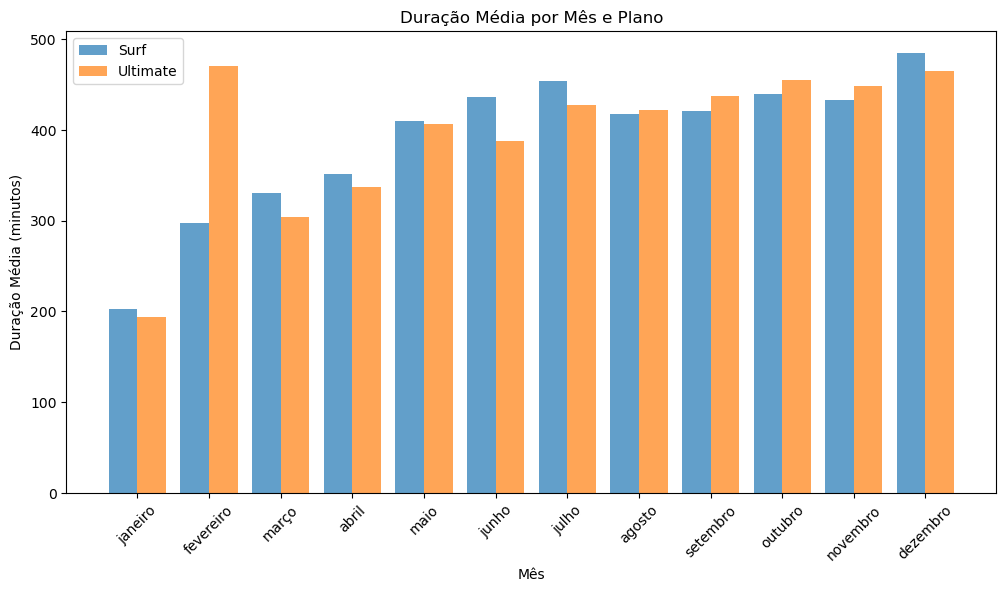

In [28]:
# Compare a duração média das chamadas de cada plano para cada mês distinto. Crie um gráfico de barras para visualizá-lo.
average_duration_per_month = merged_data.groupby(['plan', 'month'])['duration'].mean().reset_index() #duração média para cada plano em cada mês

meses_mapping = {
    1: 'janeiro',
    2: 'fevereiro',
    3: 'março',
    4: 'abril',
    5: 'maio',
    6: 'junho',
    7: 'julho',
    8: 'agosto',
    9: 'setembro',
    10: 'outubro',
    11: 'novembro',
    12: 'dezembro'
} #alterar numeral para meses escritos por extenso

average_duration_per_month['month'] = average_duration_per_month['month'].map(meses_mapping)
sort_month_plan = average_duration_per_month['month'].map({month: num for num, month in meses_mapping.items()})
sort_month_plan = average_duration_per_month.loc[sort_month_plan.sort_values().index]
sort_month_plan = average_duration_per_month.reset_index(drop=True)

surf_data = sort_month_plan[sort_month_plan['plan'] == 'surf'] #separar informações somente do plano surf
ultimate_data = sort_month_plan[sort_month_plan['plan'] == 'ultimate'] #separar informações somente do plano ultimate

bar_width = 0.4  #largura das barras
index = np.arange(len(surf_data['month']))  #posições no eixo x

plt.figure(figsize=(12, 6)) #tamanho da figura

plt.bar(index, surf_data['duration'], width=bar_width, label='Surf', alpha=0.7) #desenhar as barras para 'surf'
plt.bar(index + bar_width, ultimate_data['duration'], width=bar_width, label='Ultimate', alpha=0.7) #desenhar as barras para 'ultimate'

plt.xlabel('Mês')
plt.ylabel('Duração Média (minutos)')
plt.title('Duração Média por Mês e Plano')
plt.xticks(index + bar_width / 2, surf_data['month'], rotation = 45)  #adicionar rótulos dos meses e rotacionar meses no gráfico
plt.legend()

plt.show()


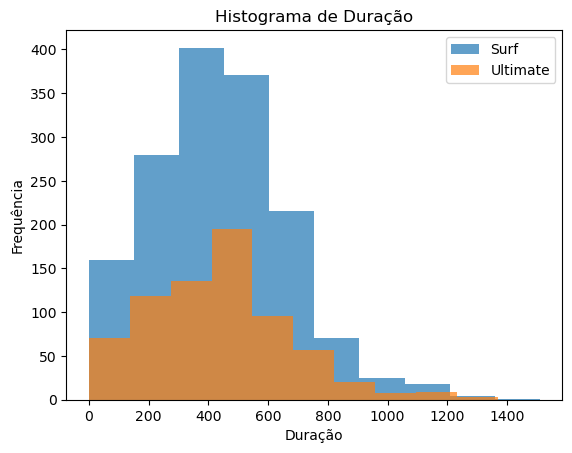

In [29]:
# Compare o número de minutos de que os usuários de cada plano necessitam a cada mês. Construa um histograma.
surf_data = merged_data[merged_data['plan'] == 'surf'] #separar informações somente do plano surf
ultimate_data = merged_data[merged_data['plan'] == 'ultimate'] #separar informações somente do plano ultimate

# Plotar histogramas com legendas
plt.hist(surf_data['duration'], bins=10, alpha=0.7, label='Surf')
plt.hist(ultimate_data['duration'], bins=10, alpha=0.7, label='Ultimate')

plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.title('Histograma de Duração')
plt.legend()

plt.show()

[Calcule a média e a variável da duração da chamada para raciocinar se os usuários de diferentes planos possuem comportamentos diferentes em suas chamadas.]

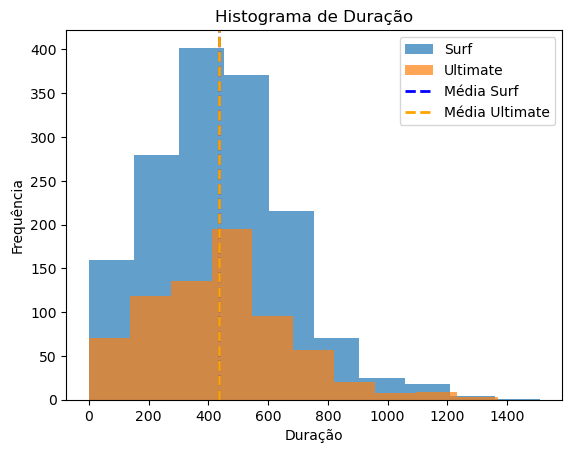

Média da duração mensal das chamadas (Surf): 437.0
Média da duração mensal das chamadas (Ultimate): 435.0

Variação da duração mensal das chamadas (Surf): 2402963284.9924245
Variação da duração mensal das chamadas (ultimate): 521959518.54545456

Desvio padrão da duração mensal das chamadas (Surf): 49020.029426678484
Desvio padrão da duração mensal das chamadas (Ultimate): 22846.433387849724


In [30]:
# Calcule a média e a variação da duração mensal das chamadas
mean_surf = round(surf_data['duration'].mean(), 0)  #arredonda para nenhuma casa decimal
mean_ultimate = round(ultimate_data['duration'].mean(), 0) #arredonda para nenhuma casa decimal
 
# Plotar histogramas com legendas
plt.hist(surf_data['duration'], bins=10, alpha=0.7, label='Surf')
plt.hist(ultimate_data['duration'], bins=10, alpha=0.7, label='Ultimate')

# Adicionar legendas e rótulos aos eixos
plt.xlabel('Duração')
plt.ylabel('Frequência')
plt.title('Histograma de Duração')

plt.axvline(mean_surf, color='blue', linestyle='dashed', linewidth=2, label='Média Surf')
plt.axvline(mean_ultimate, color='orange', linestyle='dashed', linewidth=2, label='Média Ultimate')
plt.legend()

plt.show()

####

sum_duration_surf = surf_data.groupby('month')['duration'].sum().reset_index() #agrupar por mês e somar a duração de chamadas no plano surf
sum_duration_ultimate = ultimate_data.groupby('month')['duration'].sum().reset_index() #agrupar por mês e somar a duração de chamadas no plano ultimate

# Imprimir médias
print(f"Média da duração mensal das chamadas (Surf): {mean_surf}")
print(f"Média da duração mensal das chamadas (Ultimate): {mean_ultimate}")
print()

# Calcular a variação mensal
var_duration_surf = sum_duration_surf['duration'].var()
var_duration_ultimate = sum_duration_ultimate['duration'].var()

# Exibir o resultado
print(f"Variação da duração mensal das chamadas (Surf): {var_duration_surf}")
print(f"Variação da duração mensal das chamadas (ultimate): {var_duration_ultimate}")
print()

# Calcular o desvio padrão
std_deviation_surf = np.sqrt(var_duration_surf)
std_deviation_ultimate = np.sqrt(var_duration_ultimate)

# Exibir os resultados
print(f"Desvio padrão da duração mensal das chamadas (Surf): {std_deviation_surf}")
print(f"Desvio padrão da duração mensal das chamadas (Ultimate): {std_deviation_ultimate}")

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A duração média das chamadas foi comparada entre os planos
- As distribuições foram analisadas
- Estatísticas descritivas foram calculadas: média, variância e desvio padrão
</div>


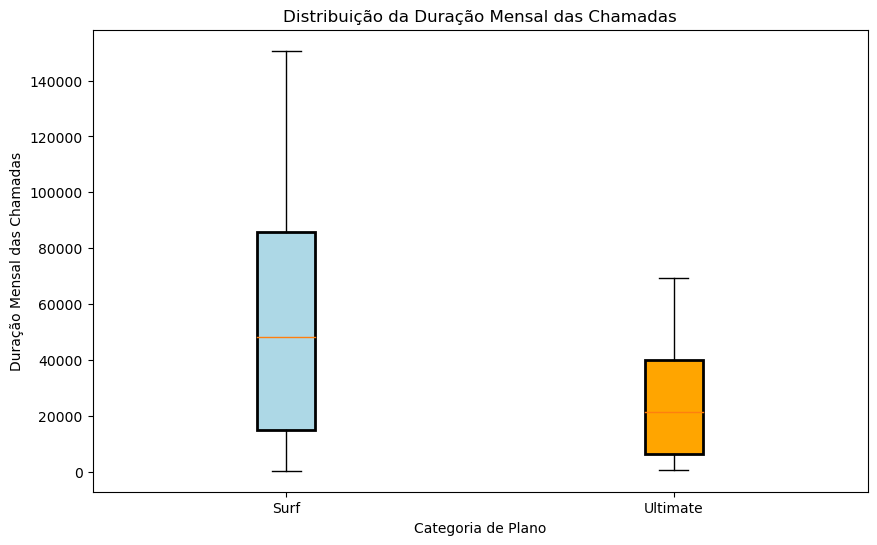

In [31]:
# Faça um diagrama de caixa para visualizar a distribuição da duração mensal das chamadas
data_to_plot = [sum_duration_surf['duration'], sum_duration_ultimate['duration']]

colors = ['lightblue', 'orange']  #escolha de cores para cada categoria
boxprops = dict(linewidth=2, color='black')  #propriedades da caixa

# Plotar o boxplot 
plt.figure(figsize=(10, 6))
boxplot = plt.boxplot(data_to_plot, labels=['Surf', 'Ultimate'], boxprops=boxprops, patch_artist=True)

# Adicionar cores às caixas com transparência
for box, color in zip(boxplot['boxes'], colors):
    box.set_facecolor(color)
    

plt.title('Distribuição da Duração Mensal das Chamadas')
plt.xlabel('Categoria de Plano')
plt.ylabel('Duração Mensal das Chamadas')
plt.show()



A variação mensal da duração das chamadas para os planos "Surf" e "Ultimate" indica a dispersão ou a diferença entre os valores mensais de duração das chamadas em cada plano. Esses valores indicam o quanto os dados estão dispersos em relação à média. Valores de variância mais altos sugerem uma maior dispersão dos dados, enquanto valores menores indicam uma menor dispersão. Para ter uma ideia mais clara da escala das variações, consideramos calcular o desvio padrão, que é a raiz quadrada da variância. O desvio padrão fornece uma medida de dispersão em uma escala semelhante à dos dados originais.

as informações de variância, desvio padrão e plotagem gráfica indicam que há uma disperção maior que o dobro no plano `surf` comparado ao plano `ultimate`.

* Desvio padrão da duração mensal das chamadas (Surf): 49020
* Desvio padrão da duração mensal das chamadas (Ultimate): 22846

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O gráfico de caixa foi apresentado por plano
- Conclusões foram apresentadas
</div>


### Mensagens

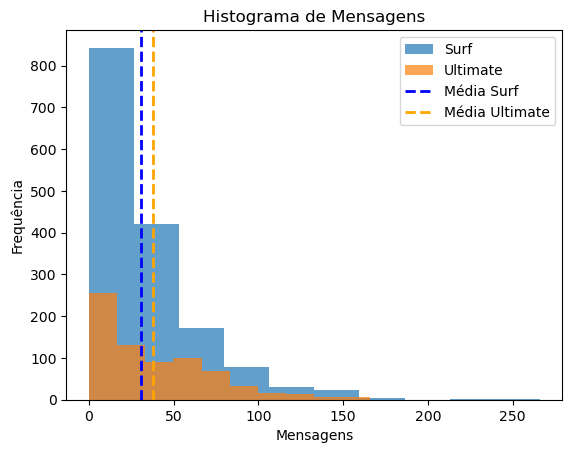

Média da mensagens enviadas por mês (Surf): 31.0
Média da mensagens enviadas por mês (Ultimate): 38.0

Variância das mensagens enviadas por mês (Surf): 1126.0082317266633
Variância das mensagens enviadas por mês (Ultimate): 1207.0779147376504

Desvio padrão das mensagens enviadas por mês (Surf): 33.55604612773477
Desvio padrão das mensagens enviadas por mês (Ultimate): 34.74302685054442


In [32]:
# Compare o número de mensagens que os usuários de cada plano tendem a enviar a cada mês
surf_msg = merged_data[merged_data['plan'] == 'surf']
ultimate_msg = merged_data[merged_data['plan'] == 'ultimate']

# Plotar histogramas com legendas
plt.hist(surf_data['total_msg'], bins=10, alpha=0.7, label='Surf')
plt.hist(ultimate_data['total_msg'], bins=10, alpha=0.7, label='Ultimate')

# Adicionar legendas e rótulos aos eixos
plt.xlabel('Mensagens')
plt.ylabel('Frequência')
plt.title('Histograma de Mensagens')

mean_surf_msg = round(surf_msg['total_msg'].mean(), 0)  #arredonda para nenhuma casa decimal
mean_ultimate_msg = round(ultimate_data['total_msg'].mean(), 0) #arredonda para nenhuma casa decimal

plt.axvline(mean_surf_msg, color='blue', linestyle='dashed', linewidth=2, label='Média Surf')
plt.axvline(mean_ultimate_msg, color='orange', linestyle='dashed', linewidth=2, label='Média Ultimate')


# Exibir a legenda
plt.legend()

# Exibir o gráfico
plt.show()

print(f"Média da mensagens enviadas por mês (Surf): {mean_surf_msg}")
print(f"Média da mensagens enviadas por mês (Ultimate): {mean_ultimate_msg}")
print()

# Calcular a variância e o desvio padrão
variance_surf_msg = np.var(surf_msg['total_msg'])
std_deviation_surf_msg = np.std(surf_msg['total_msg'])

variance_ultimate_msg = np.var(ultimate_msg['total_msg'])
std_deviation_ultimate_msg = np.std(ultimate_msg['total_msg'])

print(f"Variância das mensagens enviadas por mês (Surf): {variance_surf_msg}")
print(f"Variância das mensagens enviadas por mês (Ultimate): {variance_ultimate_msg}")
print()
print(f"Desvio padrão das mensagens enviadas por mês (Surf): {std_deviation_surf_msg}")
print(f"Desvio padrão das mensagens enviadas por mês (Ultimate): {std_deviation_ultimate_msg}")


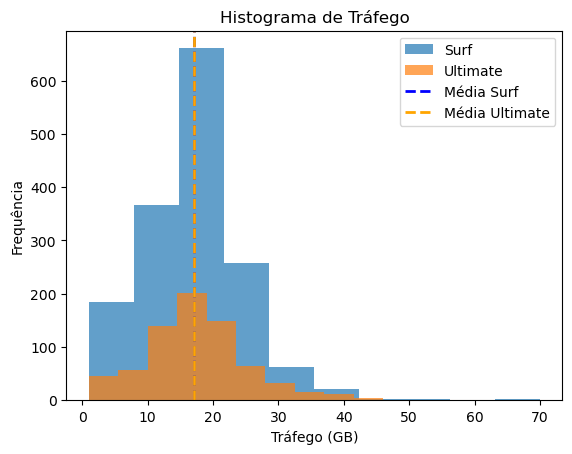

Média datráfego de dados por mês (Surf): 17.0
Média datráfego de dados por mês (Ultimate): 17.0

Variância do rnd_gb_per_month_used (Surf): 59.435560962426884
Variância do rnd_gb_per_month_used (Ultimate): 58.41337741144886

Desvio padrão do rnd_gb_per_month_used (Surf): 7.709446216326234
Desvio padrão do rnd_gb_per_month_used (Ultimate): 7.642864476846941


In [33]:
# Compare a quantidade de tráfego de internet consumido pelos usuários por plano
surf_gb = merged_data[merged_data['plan'] == 'surf']
ultimate_gb = merged_data[merged_data['plan'] == 'ultimate']

# Plotar histogramas com legendas
plt.hist(surf_gb['rnd_gb_per_month_used'], bins=10, alpha=0.7, label='Surf')
plt.hist(ultimate_gb['rnd_gb_per_month_used'], bins=10, alpha=0.7, label='Ultimate')

# Adicionar legendas e rótulos aos eixos
plt.xlabel('Tráfego (GB)')
plt.ylabel('Frequência')
plt.title('Histograma de Tráfego')

mean_surf_gb = round(surf_gb['rnd_gb_per_month_used'].mean(), 0)  #arredonda para nenhuma casa decimal
mean_ultimate_gb = round(ultimate_gb['rnd_gb_per_month_used'].mean(), 0) #arredonda para nenhuma casa decimal

plt.axvline(mean_surf_gb, color='blue', linestyle='dashed', linewidth=2, label='Média Surf')
plt.axvline(mean_ultimate_gb, color='orange', linestyle='dashed', linewidth=2, label='Média Ultimate')
plt.legend()

plt.show()

print(f"Média datráfego de dados por mês (Surf): {mean_surf_gb}")
print(f"Média datráfego de dados por mês (Ultimate): {mean_ultimate_gb}")
print()

# Calcular a variância e o desvio padrão
variance_surf_gb = np.var(surf_gb['rnd_gb_per_month_used'])
std_deviation_surf_gb = np.std(surf_gb['rnd_gb_per_month_used'])

variance_ultimate_gb = np.var(ultimate_gb['rnd_gb_per_month_used'])
std_deviation_ultimate_gb = np.std(ultimate_gb['rnd_gb_per_month_used'])

print(f"Variância do rnd_gb_per_month_used (Surf): {variance_surf_gb}")
print(f"Variância do rnd_gb_per_month_used (Ultimate): {variance_ultimate_gb}")
print()
print(f"Desvio padrão do rnd_gb_per_month_used (Surf): {std_deviation_surf_gb}")
print(f"Desvio padrão do rnd_gb_per_month_used (Ultimate): {std_deviation_ultimate_gb}")

* Mensagens:

Essas médias sugerem que Os usuários do plano "Ultimate" enviam mais mensagens por mês em comparação com os usuários do plano "Surf". Essa diferença pode ser devido a vários fatores, como a inclusão de mais recursos ou benefícios no plano "Ultimate" que incentivam os usuários a usar mais os serviços de mensagens.

No entanto, é importante notar que as médias não fornecem informações sobre a dispersão dos dados ou sobre possíveis valores extremos. Para obter uma compreensão mais completa do comportamento dos usuários em relação às mensagens, analisamos a variabilidade dos dados usando medidas como a variância e o desvio padrão.

O desvio padrão do plano "Ultimate" é um pouco maior, sugerindo uma maior dispersão nos dados em comparação com o plano "Surf". Isso significa que, em geral, as mensagens enviadas por mês no plano "Ultimate" podem variar pouca coisa a mais em relação à média do que as mensagens no plano "Surf".

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição do número de mensagens foi analisada
- As conclusões foram apresentadas
</div>


### Internet

* Dados:

As médias são idênticas para ambos os planos. Isso sugere que, em média, os usuários de ambos os planos consomem uma quantidade semelhante de tráfego de dados por mês. Não há diferença média entre os dois planos em termos de tráfego de dados.

Essa conclusão é baseada apenas nas médias e não leva em consideração a variação nos dados. Consideramos calcular a variância e o desvio padrão para entender a dispersão dos valores de tráfego de dados e obter uma visão mais completa do comportamento dos usuários em relação ao consumo de dados.

Em geral, as métricas sugerem que os planos "Surf" e "Ultimate" têm uma variação semelhante nos dados do uso mensal de gigabytes, com desvios padrão relativamente próximos. Isso pode ser útil para compreender a consistência ou variabilidade nos padrões de uso mensal de dados em cada plano.

## Receita

[Da mesma forma que você estudou o comportamento dos usuários, descreva estatisticamente as receitas dos planos.]

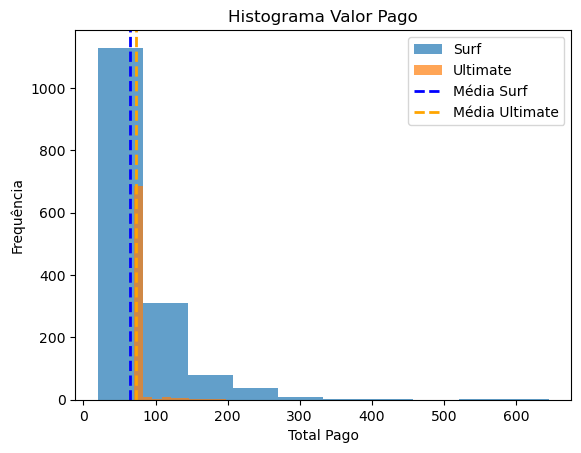

In [34]:
surf_pay = merged_data[merged_data['plan'] == 'surf']
ultimate_pay = merged_data[merged_data['plan'] == 'ultimate']

# Plotar histogramas com legendas
plt.hist(surf_pay['total_pay'], bins=10, alpha=0.7, label='Surf')
plt.hist(ultimate_pay['total_pay'], bins=10, alpha=0.7, label='Ultimate')

# Adicionar legendas e rótulos aos eixos
plt.xlabel('Total Pago')
plt.ylabel('Frequência')
plt.title('Histograma Valor Pago')

mean_surf_pay = round(surf_pay['total_pay'].mean(), 0)  #arredonda para nenhuma casa decimal
mean_ultimate_pay = round(ultimate_pay['total_pay'].mean(), 0) #arredonda para nenhuma casa decimal

plt.axvline(mean_surf_pay, color='blue', linestyle='dashed', linewidth=2, label='Média Surf')
plt.axvline(mean_ultimate_pay, color='orange', linestyle='dashed', linewidth=2, label='Média Ultimate')
plt.legend()

plt.show()

In [35]:
pivot_table = pd.pivot_table(merged_data, values='total_pay', index=['month'], columns=['plan'], aggfunc='sum')

# Resetar o índice da tabela dinâmica para evitar o erro
pivot_table = pivot_table.reset_index()
pivot_table = pivot_table.rename_axis(columns=None)

month_mapping = {
    1: 'Janeiro',
    2: 'Fevereiro',
    3: 'Março',
    4: 'Abril',
    5: 'Maio',
    6: 'Junho',
    7: 'Julho',
    8: 'Agosto',
    9: 'Setembro',
    10: 'Outubro',
    11: 'Novembro',
    12: 'Dezembro'
}



# Mesclar a tabela dinâmica de volta ao DataFrame original com base em 'month'
merged_total = pivot_table[['month', 'surf', 'ultimate']].rename(columns={'surf': 'surf_total', 'ultimate': 'ultimate_total'})

merged_total['month'] = merged_total['month'].replace(month_mapping)

total_soma_surf = round(merged_total['surf_total'].sum(), 0)
total_soma_ultimate = round(merged_total['ultimate_total'].sum(), 0)

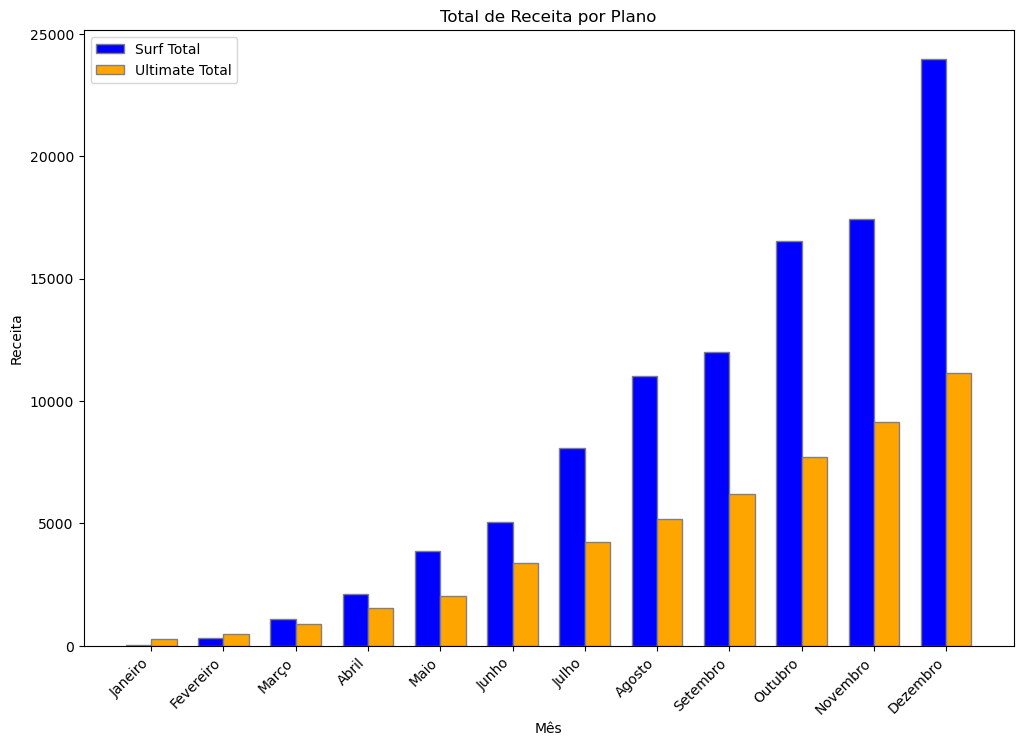

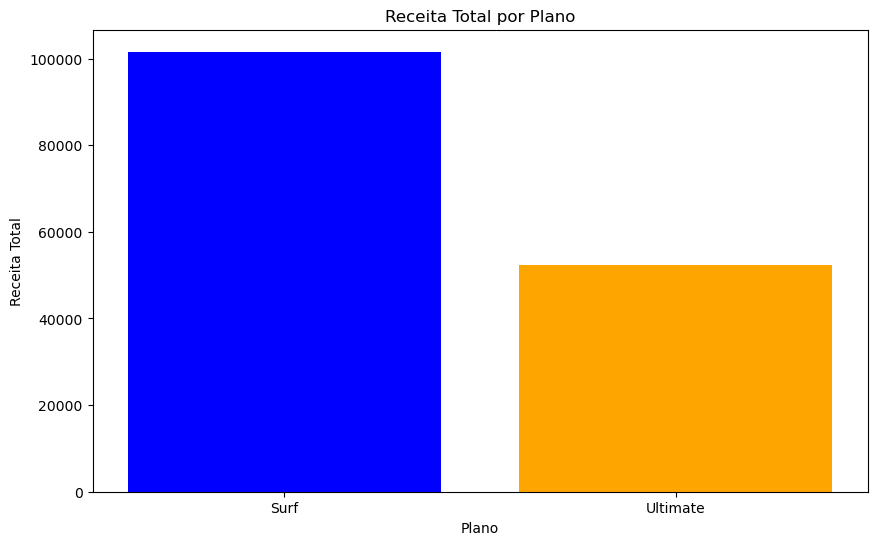

Receita total plano Surf: 101571.0
Receita total plano Ultimate: 52304.0

Média valores pagos por mês (Surf): 65.0
Média valores pagos por mês (Ultimate): 73.0

Variância do total_payment (Surf): 3696.906054863994
Variância do total_payment (Ultimate): 169.36246913580166

Desvio padrão do total_payment (Surf): 60.80218791181773
Desvio padrão do total_payment (Ultimate): 13.01393365342707


In [36]:
months = merged_total['month']
surf_totals = merged_total['surf_total']
ultimate_totals = merged_total['ultimate_total']

plt.figure(figsize=(12, 8))

# Configurar a largura das barras
bar_width = 0.35

# Configurar a posição das barras no eixo x
r1 = range(len(months))
r2 = [x + bar_width for x in r1]

# Criar o gráfico de barras lado a lado
plt.bar(r1, surf_totals, color='blue', width=bar_width, edgecolor='grey', label='Surf Total')
plt.bar(r2, ultimate_totals, color='orange', width=bar_width, edgecolor='grey', label='Ultimate Total')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Receita')
plt.title('Total de Receita por Plano')
plt.xticks([r + bar_width/2 for r in range(len(months))], months, rotation=45, ha='right')


# Adicionar a legenda
plt.legend()

# Mostrar o gráfico
plt.show()

planos = ['Surf', 'Ultimate']
receitas_totais = [total_soma_surf, total_soma_ultimate]

# Criando um gráfico de barras simples
plt.figure(figsize=(10, 6))
plt.bar(planos, receitas_totais, color=['blue', 'orange'])
plt.title('Receita Total por Plano')
plt.xlabel('Plano')
plt.ylabel('Receita Total')
plt.show()

print('Receita total plano Surf:', total_soma_surf)
print('Receita total plano Ultimate:', total_soma_ultimate)
print()

# Calcular a média
print(f"Média valores pagos por mês (Surf): {mean_surf_pay}")
print(f"Média valores pagos por mês (Ultimate): {mean_ultimate_pay}")
print()
# Calcular a variância e o desvio padrão
variance_surf_pay = np.var(surf_pay['total_pay'])
std_deviation_surf_pay = np.std(surf_pay['total_pay'])

variance_ultimate_pay = np.var(ultimate_pay['total_pay'])
std_deviation_ultimate_pay = np.std(ultimate_pay['total_pay'])

print(f"Variância do total_payment (Surf): {variance_surf_pay}")
print(f"Variância do total_payment (Ultimate): {variance_ultimate_pay}")
print()
print(f"Desvio padrão do total_payment (Surf): {std_deviation_surf_pay}")
print(f"Desvio padrão do total_payment (Ultimate): {std_deviation_ultimate_pay}")

O plano "Surf" gera uma receita total mais alta em comparação com o plano "Ultimate".

A média dos valores pagos por mês é mais baixa para o plano "Surf" em comparação com o plano "Ultimate".

A variância e o desvio padrão indicam uma maior dispersão nos valores pagos por mês para o plano "Surf", sugerindo uma maior variabilidade nos pagamentos. Para o plano "Ultimate", a variabilidade é menor, indicando pagamentos mais consistentes ao longo do tempo.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- A distribuição da receita por plano foi analisada
- As estatísticas foram calculadas
- As conclusões foram apresentadas
</div>


## Teste hipóteses estatísticas

A hipótese nula afirma que não há diferença significativa entre as médias dos pagamentos para os planos "Surf" e "Ultimate". 

A hipótese alternativa sugere que existe uma diferença significativa entre as médias dos pagamentos para os planos "Surf" e "Ultimate".

No final do código,  é realizado o teste t para testar a igualdade das médias. Se o valor-p resultante for menor que o nível de significância alfa (definido em 0,05), a hipótese nula será rejeitada em favor da hipótese alternativa. Caso contrário, não há evidências suficientes para rejeitar a hipótese nula.

Esta interpretação assume que estamos realizando um teste de duas amostras independentes para comparar as médias dos pagamentos entre os planos "Surf" e "Ultimate".

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
* Definição formal das hipóteses foram descritas acima.
</div>

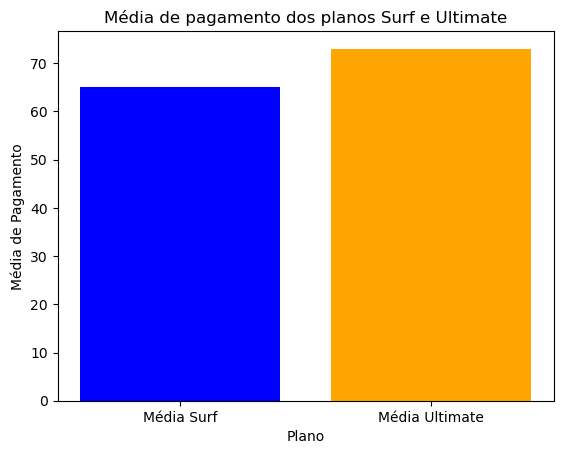

Rejeitar Hipótese Nula:
A receita média difere entre os planos "Surf" e "Ultimate".

Test Statistic: -5.018842122902009
Valor-p: 5.693922533781941e-07


In [37]:
# Teste as hipóteses
surf_pay = merged_data[merged_data['plan'] == 'surf']['total_pay']
ultimate_pay = merged_data[merged_data['plan'] == 'ultimate']['total_pay']

categories = ['Média Surf', 'Média Ultimate']

# Valores para os eixos y
values = [mean_surf_pay, mean_ultimate_pay]

# Criar o gráfico de barra
plt.bar(categories, values, color=['blue', 'orange'])

# Adicionar rótulos
plt.xlabel('Plano')
plt.ylabel('Média de Pagamento')
plt.title('Média de pagamento dos planos Surf e Ultimate')

# Exibir o gráfico
plt.show()

t_statistic, p_value = st.ttest_ind(surf_pay, ultimate_pay, equal_var=False)

# Escolha o valor alfa (nível de significância)
alfa = 0.05

# Compare o valor-p com o valor alfa
if p_value < alfa:
    print(f'Rejeitar Hipótese Nula:\nA receita média difere entre os planos "Surf" e "Ultimate".')
else:
    print(f'Não há evidências para rejeitar Hipótese Nula:\nA receita média é igual entre os planos "Surf" e "Ultimate".')
print()
# Exibir os resultados do teste
print(f'Test Statistic: {t_statistic}')
print(f'Valor-p: {p_value}')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O valor de alpha foi definido
- Os testes foram conduzidos
- Os resultados foram interpretados
- O argumento `equal_var` foi configurado para conduzir o teste assumindo diferença nas variâncias.
</div>


Para uma hipótese nula afimra que não há diferença significativa na média de pagamento entre a área "NY-NJ" (New York-Newark-Jersey City, NY-NJ-PA MSA) e outras cidades.

Já a hipótese alternativa nos diz que há uma diferença significativa na média de pagamento entre a área "NY-NJ" e outras cidades.

Essas hipóteses são baseadas na análise de um teste t independente, que compara as médias de pagamento entre dois grupos distintos (no caso, "NY-NJ" e outras cidades). O teste estatístico e o p-valor são utilizados para avaliar se há evidências estatísticas suficientes para rejeitar a hipótese nula em favor da hipótese alternativa. O nível de significância (alfa) escolhido para este teste é 0.05. Se o p-valor for menor que alfa, a hipótese nula é rejeitada, indicando que há uma diferença significativa nas médias de pagamento entre os dois grupos.

<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
    
* Definição formal das hipóteses foram descritas acima.
</div>

média NY-NJ: 63.0
média outras cidades: 68.0


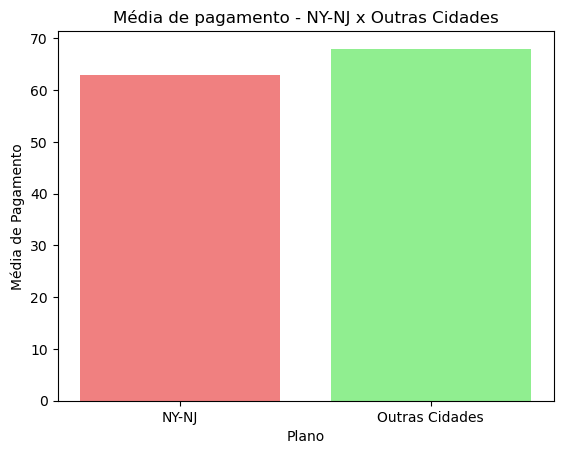

Não há evidências para rejeitar Hipótese Nula:
A média de pagamento é semelhante entre a área "NY-NJ" e outras cidades.

Test Statistic: -1.829772124896852
p-value: 0.0678114401248752


In [38]:
# Teste as hipóteses
from scipy import stats
merged_data = pd.merge(merged_data, df_users[['user_id', 'city']], on='user_id', how='left')

avg_ny_nj = round(merged_data.loc[merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_pay'].mean(), 0)
avg_other_cities = round(merged_data.loc[merged_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_pay'].mean(), 0)

print('média NY-NJ:', avg_ny_nj)
print('média outras cidades:', avg_other_cities)

categories = ['NY-NJ', 'Outras Cidades']


# Valores para os eixos y
values = [avg_ny_nj, avg_other_cities]

# Criar o gráfico de barra
plt.bar(categories, values, color=['lightcoral', 'lightGreen'])

# Adicionar rótulos
plt.xlabel('Plano')
plt.ylabel('Média de Pagamento')
plt.title('Média de pagamento - NY-NJ x Outras Cidades')

# Exibir o gráfico
plt.show()

# Realizar o teste t independente
t_statistic, p_value = stats.ttest_ind(
    merged_data.loc[merged_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_pay'],
    merged_data.loc[merged_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'total_pay'],
    equal_var=False
)

# Escolher o valor alfa (nível de significância)
alfa = 0.05

# Comparar o valor-p com o valor alfa
if p_value < alfa:
    print('Rejeitar Hipótese Nula:\nA média de pagamento difere entre a área "NY-NJ" e outras cidades.')
else:
    print('Não há evidências para rejeitar Hipótese Nula:\nA média de pagamento é semelhante entre a área "NY-NJ" e outras cidades.')

print()
    
# Imprimir os resultados do teste
print(f'Test Statistic: {t_statistic}')
print(f'p-value: {p_value}')

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O valor de alpha foi definido
- Os testes foram conduzidos
- Os resultados foram interpretados
- O argumento `equal_var` foi configurado para conduzir o teste assumindo diferença nas variâncias.
</div>


## Conclusão geral

* Duração das Chamadas:

    A variação mensal da duração das chamadas indica que há mais dispersão nos dados do plano "Surf" em comparação com o plano "Ultimate". O desvio padrão no plano "Surf" é mais que o dobro do desvio padrão no plano "Ultimate". Isso sugere que os usuários do plano "Surf" têm uma maior variação nos minutos de chamadas mensais em relação à média do que os usuários do plano "Ultimate".
    

* Mensagens:

    Os usuários do plano "Ultimate" enviam mais mensagens por mês em comparação com os usuários do plano "Surf". A variabilidade nas mensagens é um pouco maior no plano "Ultimate", indicando que os padrões de uso de mensagens podem variar um pouco mais em relação à média nesse plano.
    

* Dados:

    As médias de tráfego de dados são idênticas para ambos os planos, mas a análise de variância e desvio padrão pode fornecer insights adicionais sobre a dispersão dos dados. Em geral, os planos "Surf" e "Ultimate" têm uma variação semelhante nos dados do uso mensal de gigabytes, com desvios padrão relativamente próximos.
    

* Receita:

    O plano "Surf" gera uma receita total mais alta, mas a média dos valores pagos por mês é mais baixa em comparação com o plano "Ultimate". A variância e o desvio padrão indicam uma maior dispersão nos valores pagos por mês no plano "Surf", enquanto o plano "Ultimate" apresenta uma variabilidade menor, sugerindo pagamentos mais consistentes ao longo do tempo.

    
    
* Conclusão


    * Duração das Chamadas:
    O plano "Surf" tem uma maior variação na duração das chamadas mensais em relação à média do que o plano "Ultimate".


    * Mensagens:
    Os usuários do plano "Ultimate" tendem a enviar mais mensagens, com uma variabilidade um pouco maior em relação à média, porém pouco significativa, demonstrando uma semelhança no envio de mansagens com usuários do plano 'surf'.


    * Dados:
    Não há diferença média significativa nas médias mensais de tráfego de dados entre os planos e a análise de variância e desvio padrão fornece informações sobre a dispersão dos dados também baixa.


    * Receita:
    Plano "Surf" gera mais receita total, mas os usuários do plano "Ultimate" pagam mais em média por mês. A variabilidade nos pagamentos é maior no plano "Surf".
    
    
    

* Com base nos resultados do teste estatístico:

    Há evidências estatísticas suficientes para rejeitar a hipótese nula de que a receita média é a mesma nos planos "Surf" e "Ultimate".

    A diferença nas médias é estatisticamente significativa.

    Pode-se concluir que a receita média difere entre os planos "Surf" e "Ultimate". A análise sugere que a escolha do plano pode influenciar significativamente a receita média.

No geral, a escolha entre os planos pode depender das preferências do usuário em termos de uso de chamadas, mensagens, dados e do valor que estão dispostos a pagar. Os planos têm características distintas em relação à variabilidade de uso e custos associados.

Uma boa estratégia de marketing pode ser desenvolvida considerando as características específicas dos planos "Surf" e "Ultimate", bem como os dados e padrões de uso dos clientes. 

1 - Segmentação de Mercado:

    Analisar os dados dos usuários atuais para identificar grupos específicos de clientes com diferentes padrões de uso. Isso permite uma segmentação eficaz do mercado, possibilitando a criação de campanhas personalizadas, como fizemos comparando entre NY-NJ e as demais regiões.
    
2 - Comunicação Clara e Destaques de Benefícios:

    Destacar claramente os benefícios exclusivos de cada plano em campanhas de marketing. Por exemplo, para o plano "Surf", destaque o preço acessível e a generosa quantidade de dados. Para o plano "Ultimate", destaque os minutos, mensagens e a alta quantidade de dados com taxas de uso excedente mais baixas.
    
3 - Ofertas e Promoções Personalizadas:

    Criar ofertas e promoções personalizadas para cada plano, incentivando os usuários a migrarem para o plano que melhor atenda às suas necessidades. Por exemplo, ofereça descontos ou bônus para clientes que optarem por migrar do plano "Surf" para plano "Ultimate" durante um determinado período. Visto que, apesar de ter uma parcela no faturamento menor, o plano "Ultimate" possui uma média de pagamento maior e uma variabilidade de pagamento menor proporcionando um melhor planejamento operacional e financeiro futuro.
    
4 - Programas de Fidelidade:

    Introduza programas de fidelidade que recompensam os clientes por sua lealdade. Isso pode incluir benefícios adicionais, descontos ou brindes exclusivos para clientes que permanecem no plano por um período prolongado. Quanto melhor o plano, melhor o programa de fidelidade.
    
5 - Feedback e Pesquisas de Satisfação:

    Realize pesquisas de satisfação do cliente para entender melhor suas necessidades e expectativas. Use o feedback para ajustar os planos, serviços e estratégias de marketing conforme necessário.
    
6 - Monitoramento Contínuo dos dados e Ajustes:

    Mantenha uma vigilância constante sobre os dados de uso, feedback do cliente e tendências de mercado. Faça ajustes na estratégia de marketing conforme necessário para permanecer relevante e atender às demandas do mercado.
    
    
Estas são algumas conclusões e sugestões e aponto como destaque uma boa estratégia de marketing que incentive a migração dos clientes do plano "surf" para o plano "Ultimate".

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- Excelentes conclusões gerais!
</div>


<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado 
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Análises bem detalhadas em cada etapa do projeto
- Uso adequado de gráfico e estatísticas descritivas
    
**Até breve!**
</s>
</div>


<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>
